In [88]:
import pandas as pd
import numpy as np
import seaborn as see
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [89]:
hpaS =  pd.read_csv("E:\ML project\heart.csv")
#hpaS.set_index('age', inplace=True)
hpaS.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
#hpaS.pop('oldpeak')
#hpaS.pop('fbs')
#hpaS.pop('restecg')
#hpaS.pop('cp')
#hpaS.pop('sex')
#hpaS.pop('caa')
#hpaS.pop('slp')
#hpaS.pop('thall')
#hpaS.pop('exng')
#hpaS.pop('trtbps')
#hpaS.pop('chol')
#hpaS.pop('age')
#hpaS.pop('thalachh')
#hpaS.head()

In [91]:
#hpaS = hpaS[hpaS['trtbps'] <= 180]
#see.boxplot(hpaS['trtbps'])

In [92]:
#hpaS = hpaS[hpaS['chol'] <= 420]
#see.boxplot(hpaS['chol'])

In [93]:
#hpaS = hpaS[hpaS['oldpeak'] <= 5]
#see.boxplot(hpaS['oldpeak'])

In [94]:
hpaS['output'].value_counts()


1    165
0    138
Name: output, dtype: int64

In [95]:

#see.pairplot(hpaS, hue='output')

In [96]:
scaler =  MinMaxScaler()
hpaS = scaler.fit_transform(hpaS)
colomNames = ['age', 'sex', 'cp', 'trtbps', 'chol',	'fbs',	'restecg',	'thalachh',	'exng',	'oldpeak',	'slp',	'caa',	'thall', 'output']
hap_svm = pd.DataFrame(hpaS, columns= colomNames)
hap_svm.set_index('age', inplace=True)
hap_svm.head()
#see.pairplot(hpaS, hue='output')

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,
0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


<AxesSubplot:xlabel='output', ylabel='count'>

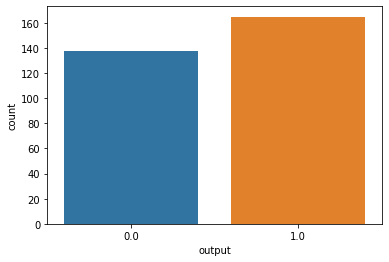

In [97]:
see.countplot(x='output', data = hap_svm)

In [98]:
x = hap_svm.drop('output', axis=1)
y = hap_svm['output']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, train_size=0.85, stratify=y,  random_state=123)
x_train

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,,,,,,,,,,,,
0.604167,1.0,0.000000,0.528302,0.328767,0.0,0.0,0.305344,1.0,0.129032,1.0,0.00,1.000000
0.500000,1.0,0.000000,0.452830,0.228311,0.0,0.0,0.305344,1.0,0.000000,1.0,0.00,1.000000
0.250000,1.0,0.666667,0.169811,0.283105,0.0,0.5,0.824427,0.0,0.000000,1.0,0.00,0.666667
0.437500,0.0,0.666667,0.245283,0.212329,0.0,0.5,0.664122,0.0,0.258065,0.5,0.00,0.666667
0.833333,1.0,0.666667,0.433962,0.292237,0.0,0.0,0.572519,0.0,0.322581,0.5,0.75,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
0.854167,1.0,0.666667,0.622642,0.326484,0.0,0.5,0.312977,1.0,0.467742,0.5,0.25,1.000000
0.625000,1.0,0.666667,0.301887,0.210046,1.0,0.5,0.480916,0.0,0.354839,0.5,0.25,0.333333
0.604167,1.0,0.000000,0.292453,0.397260,0.0,0.0,0.763359,0.0,0.000000,1.0,0.50,1.000000


In [100]:
#plt.scatter(x= x_train[:][:], y= x_train[:][:])
#plt.show()

In [101]:
from sklearn.svm import SVC

In [102]:
hap_SVM = SVC(kernel= 'linear', degree=3, probability=True)

In [103]:
hap_SVM.fit(x_train, y_train)
hap_SVM.score(x_test, y_test)
#scorss = cross_val_score(hap_SVM, x,y, cv=3)
#print(scorss)
#print('accuracy : %0.2f  Standard daviaition: %0.2f' % (scorss.mean(), scorss.std()) )

0.8478260869565217

In [104]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
pred = hap_SVM.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, pred))
print('Recall: ', recall_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))
print('F1-Score: ', f1_score(y_test, pred))

Accuracy:  0.8478260869565217
Recall:  0.96
Precision:  0.8
F1-Score:  0.8727272727272728


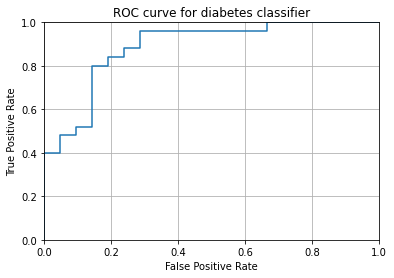

In [105]:
  
y_pred_prob = hap_SVM.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [106]:
confusionM = confusion_matrix(y_test, pred)   
print(confusionM)


[[15  6]
 [ 1 24]]


<AxesSubplot:>

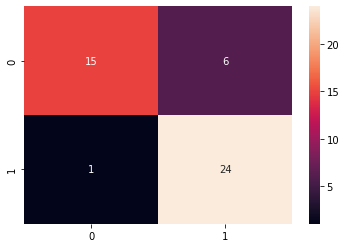

In [107]:
see.heatmap(confusionM, annot= True)
